CONTEXTO DEL PROYECTO



**DICCIONARIO DE DATOS**

---

Descripción de los campos:

**IMC:** El Índice de Masa Corporal (IMC)

**25_TenArtSis (Tensión Arterial Sistólica):** Mide la presión en las arterias cuando el corazón late y empuja la sangre al resto del cuerpo.

**26_TenArtDitlica (Tensión Arterial Diastólica):** Mide la presión en las arterias cuando el corazón está en reposo entre latidos.

**36_RcbeIECA_SI:** Indicador de si el paciente está tomando medicamentos inhibidores de la enzima convertidora de angiotensina (IECA), que se utilizan para tratar la hipertensión y problemas cardíacos.

**37_RcbeARA2_SI:** los ARA2 son medicamentos utilizados para tratar la hipertensión y problemas cardíacos.

**22_EtiologiaERC_HTA-DM:** Este campo indica si la enfermedad renal crónica (ERC) de una persona es causada por la hipertensión (HTA) y/o la diabetes mellitus (DM).

**18_DxHTA_SI (Diagnóstico de Hipertensión Arterial):** Indicador de si el paciente tiene diagnóstico de hipertensión arterial.

**22_EtiologiaERC_HTA:** Indica si la enfermedad renal crónica está relacionada con la hipertensión (HTA).

**22_EtiologiaERC_DM:** Indica si la enfermedad renal crónica está relacionada con la diabetes mellitus (DM).

**20_DxDM_SI:** Indicador de si el paciente tiene diagnóstico de diabetes mellitus.


📚Importación de librerías necesarias para el análisis de datos, visualización, preprocesamiento y modelado de regresión logística.

In [ ]:
#Librerias
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**CARGA DE LOS DATOS**



In [ ]:
import gdown
import pandas as pd

# ID del archivo de Google Drive
file_id = '1QCY7WYwSzFQyhM0oY4_xP7C6ict4Oj17'

# Construir la URL de descarga
url = f'https://drive.google.com/uc?id={file_id}'

# Descargar el archivo CSV
output = 'archivo.csv'  # Nombre que tendrá el archivo descargado
gdown.download(url, output, quiet=False)

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(output, usecols=['Indice Masa Corporal = Peso/talla Al Cuadrado', '24_Talla', '23_Peso',
                                   '25_TenArtSis', '26_TenArtDitlica', '36_RcbeIECA_SI', '37_RcbeARA2_SI',
                                   'EDAD (Años cumplidos)', '8_Sexo_F', '18_DxHTA_SI', '20_DxDM_SI',
                                   '22_EtiologiaERC_HTA', '22_EtiologiaERC_DM', '22_EtiologiaERC_HTA-DM',
                                   'CLASIFICACION FINAL DEL RIESGO_ALTO','CLASIFICACION FINAL DEL RIESGO_BAJO',
                                   'CLASIFICACION FINAL DEL RIESGO_MODERADO', 'CLASIFICACION FINAL DEL RIESGO_MUY ALTO'])

#Se validan datos nulos
print("\nValores nulos:\n", df.isnull().sum())

# Mostrar las primeras filas para verificar
print("\nVerificar primeras lineas:\n", df.head())



Downloading...
From (original): https://drive.google.com/uc?id=1QCY7WYwSzFQyhM0oY4_xP7C6ict4Oj17
From (redirected): https://drive.google.com/uc?id=1QCY7WYwSzFQyhM0oY4_xP7C6ict4Oj17&confirm=t&uuid=a02ff7f5-8223-46d1-bde5-2907e36f1a48
To: /content/archivo.csv
100%|██████████| 301M/301M [00:06<00:00, 47.9MB/s]



Valores nulos:
 Indice Masa Corporal = Peso/talla Al Cuadrado    0
24_Talla                                         0
23_Peso                                          0
25_TenArtSis                                     0
26_TenArtDitlica                                 0
36_RcbeIECA_SI                                   0
37_RcbeARA2_SI                                   0
22_EtiologiaERC_HTA-DM                           0
EDAD (Años cumplidos)                            0
8_Sexo_F                                         0
18_DxHTA_SI                                      0
22_EtiologiaERC_HTA                              0
22_EtiologiaERC_DM                               0
CLASIFICACION FINAL DEL RIESGO_ALTO              0
CLASIFICACION FINAL DEL RIESGO_BAJO              0
CLASIFICACION FINAL DEL RIESGO_MODERADO          0
20_DxDM_SI                                       0
CLASIFICACION FINAL DEL RIESGO_MUY ALTO          0
dtype: int64

Verificar primeras lineas:
    Indice Masa Corporal

### **Validación de duplicados**

In [ ]:
# Contar filas duplicadas
print("Duplicados antes de limpiar:", df.duplicated().sum())

# Eliminar duplicados
df = df.drop_duplicates()

# Verificar si se eliminaron
print("Duplicados después de limpiar:", df.duplicated().sum())

Duplicados antes de limpiar: 1855230
Duplicados después de limpiar: 0


In [ ]:
#verificar nulos
print(df.isnull().sum())

Indice Masa Corporal = Peso/talla Al Cuadrado    0
24_Talla                                         0
23_Peso                                          0
25_TenArtSis                                     0
26_TenArtDitlica                                 0
36_RcbeIECA_SI                                   0
37_RcbeARA2_SI                                   0
22_EtiologiaERC_HTA-DM                           0
EDAD (Años cumplidos)                            0
8_Sexo_F                                         0
18_DxHTA_SI                                      0
22_EtiologiaERC_HTA                              0
22_EtiologiaERC_DM                               0
CLASIFICACION FINAL DEL RIESGO_ALTO              0
CLASIFICACION FINAL DEL RIESGO_BAJO              0
CLASIFICACION FINAL DEL RIESGO_MODERADO          0
20_DxDM_SI                                       0
CLASIFICACION FINAL DEL RIESGO_MUY ALTO          0
dtype: int64



###  **Verificación de datos faltantes**

In [ ]:
#verificar valores vacios
valores_vacios = (df == " ").sum()

print(valores_vacios)

Indice Masa Corporal = Peso/talla Al Cuadrado    0
24_Talla                                         0
23_Peso                                          0
25_TenArtSis                                     0
26_TenArtDitlica                                 0
36_RcbeIECA_SI                                   0
37_RcbeARA2_SI                                   0
22_EtiologiaERC_HTA-DM                           0
EDAD (Años cumplidos)                            0
8_Sexo_F                                         0
18_DxHTA_SI                                      0
22_EtiologiaERC_HTA                              0
22_EtiologiaERC_DM                               0
CLASIFICACION FINAL DEL RIESGO_ALTO              0
CLASIFICACION FINAL DEL RIESGO_BAJO              0
CLASIFICACION FINAL DEL RIESGO_MODERADO          0
20_DxDM_SI                                       0
CLASIFICACION FINAL DEL RIESGO_MUY ALTO          0
dtype: int64



###  Cambio de etiquetas

In [ ]:
df = df.rename(columns={'Indice Masa Corporal = Peso/talla Al Cuadrado': 'IMC'})

#nombre de las columnas
print(df.columns)

Index(['IMC', '24_Talla', '23_Peso', '25_TenArtSis', '26_TenArtDitlica',
       '36_RcbeIECA_SI', '37_RcbeARA2_SI', '22_EtiologiaERC_HTA-DM',
       'EDAD (Años cumplidos)', '8_Sexo_F', '18_DxHTA_SI',
       '22_EtiologiaERC_HTA', '22_EtiologiaERC_DM',
       'CLASIFICACION FINAL DEL RIESGO_ALTO',
       'CLASIFICACION FINAL DEL RIESGO_BAJO',
       'CLASIFICACION FINAL DEL RIESGO_MODERADO', '20_DxDM_SI',
       'CLASIFICACION FINAL DEL RIESGO_MUY ALTO'],
      dtype='object')


[texto del enlace](https://)
###  Modificación de la variable objetivo: Nivel de riesgo

In [ ]:
# Crear una nueva columna de riesgo basada en las columnas existentes
df['Riesgo_Nivel'] = (
    df['CLASIFICACION FINAL DEL RIESGO_BAJO'] * 1 +
    df['CLASIFICACION FINAL DEL RIESGO_MODERADO'] * 2 +
    df['CLASIFICACION FINAL DEL RIESGO_ALTO'] * 3 +
    df['CLASIFICACION FINAL DEL RIESGO_MUY ALTO'] * 4
)

# Eliminar las columnas originales de clasificación de riesgo
df = df.drop(columns=['CLASIFICACION FINAL DEL RIESGO_BAJO', 'CLASIFICACION FINAL DEL RIESGO_MODERADO',
                      'CLASIFICACION FINAL DEL RIESGO_ALTO', 'CLASIFICACION FINAL DEL RIESGO_MUY ALTO'])

# Verificar la nueva columna
print(df[['Riesgo_Nivel']].value_counts())

Riesgo_Nivel
3               380002
1               263660
2               244388
4                39628
Name: count, dtype: int64



## **Tipo de formato de cada variable**

In [ ]:
#tipo datos
print(df.dtypes)

IMC                       float64
24_Talla                  float64
23_Peso                   float64
25_TenArtSis              float64
26_TenArtDitlica          float64
36_RcbeIECA_SI            float64
37_RcbeARA2_SI            float64
22_EtiologiaERC_HTA-DM      int64
EDAD (Años cumplidos)     float64
8_Sexo_F                    int64
18_DxHTA_SI                 int64
22_EtiologiaERC_HTA         int64
22_EtiologiaERC_DM          int64
20_DxDM_SI                  int64
Riesgo_Nivel                int64
dtype: object


In [ ]:
#Las variables 36_RcbeIECA_SI y 37_RcbeARA2_SI son variables binaria pero esta con formato de numero decimal:
df['36_RcbeIECA_SI'] = df['36_RcbeIECA_SI'].astype('int64')
df['37_RcbeARA2_SI'] = df['37_RcbeARA2_SI'].astype('int64')

print(df[['36_RcbeIECA_SI', '37_RcbeARA2_SI']].head(10))

   36_RcbeIECA_SI  37_RcbeARA2_SI
0               0               0
1               0               0
2               0               0
3               0               0
4               0               0
5               0               0
6               0               0
7               0               1
8               0               0
9               0               0



###  **Correlaciones: Verificación de posible multicolinealidad**

                             IMC  24_Talla   23_Peso  25_TenArtSis  \
IMC                     1.000000 -0.147545  0.216364      0.013961   
24_Talla               -0.147545  1.000000  0.392988      0.010825   
23_Peso                 0.216364  0.392988  1.000000      0.054638   
25_TenArtSis            0.013961  0.010825  0.054638      1.000000   
26_TenArtDitlica        0.026282  0.063862  0.131119      0.598140   
36_RcbeIECA_SI         -0.010338 -0.028075 -0.043108     -0.014062   
37_RcbeARA2_SI          0.015066 -0.048784  0.039983      0.145749   
22_EtiologiaERC_HTA-DM  0.021256 -0.026077  0.064168      0.052040   
EDAD (Años cumplidos)  -0.068642 -0.139426 -0.294777      0.058583   
8_Sexo_F                0.034773 -0.416344 -0.094126     -0.007053   
18_DxHTA_SI             0.000900 -0.018970 -0.008157      0.134041   
22_EtiologiaERC_HTA    -0.018114  0.010607 -0.061759      0.041514   
22_EtiologiaERC_DM     -0.000894  0.019009  0.008188     -0.134027   
20_DxDM_SI          

<Axes: >

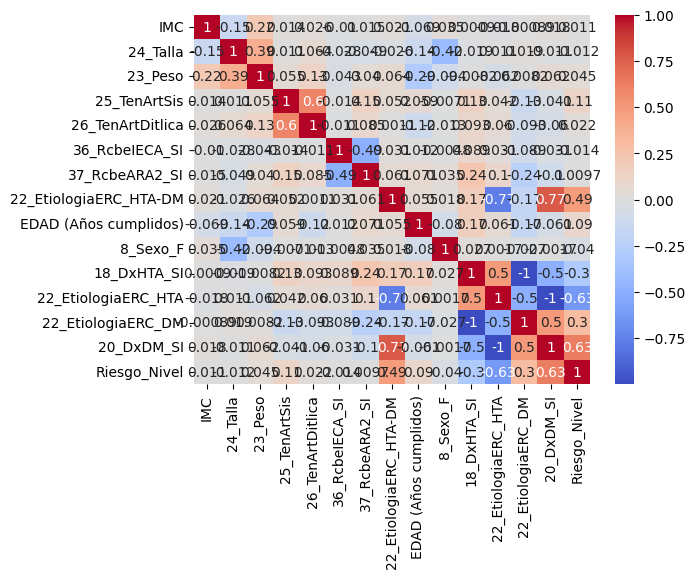

In [ ]:
#correlaciones
correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


# RENOMBRAR VARIABLES PARA GRÁFICO

In [ ]:
'''# Diccionario de nuevos nombres de variables
nombres_nuevos = {
    '36_RcbeIECA_SI': 'Uso IECA',
    '37_RcbeARA2_SI': 'Uso ARA2',
    'IMC': 'Índice Masa Corporal',
    'EDAD (Años cumplidos)': 'Edad',
    '8_Sexo_F': 'Sexo',
    '22_EtiologíaERC_HTA': 'E.Renal_Hiper',
    '22_EtiologíaERC_DM': 'E.Renal_Diab',
    '24_Talla': 'Talla',
    '23_Peso': 'Peso',
    '25_TenArtSis': 'Tensión Sistólica',
    '26_TenArtDitlica': 'Tensión Diastólica',
    '18_DxHTA_SI': 'Hipertensión',
    '20_DxDM_SI': 'Diabetes',
    'Riesgo_Nivel': 'Nivel de Riesgo'
}

# Renombrar las variables en la matriz de correlación
correlation_matrix = df.corr().rename(columns=nombres_nuevos, index=nombres_nuevos)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Generar el mapa de calor con los nuevos nombres
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu", center=0, linewidths=0.5, cbar_kws={'shrink': 0.8})

# Ajustar la rotación de las etiquetas
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Agregar título
plt.title("Mapa de calor de correlaciones", fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()
'''

'# Diccionario de nuevos nombres de variables\nnombres_nuevos = {\n    \'36_RcbeIECA_SI\': \'Uso IECA\',\n    \'37_RcbeARA2_SI\': \'Uso ARA2\',\n    \'IMC\': \'Índice Masa Corporal\',\n    \'EDAD (Años cumplidos)\': \'Edad\',\n    \'8_Sexo_F\': \'Sexo\',\n    \'22_EtiologíaERC_HTA\': \'E.Renal_Hiper\',\n    \'22_EtiologíaERC_DM\': \'E.Renal_Diab\',\n    \'24_Talla\': \'Talla\',\n    \'23_Peso\': \'Peso\',\n    \'25_TenArtSis\': \'Tensión Sistólica\',\n    \'26_TenArtDitlica\': \'Tensión Diastólica\',\n    \'18_DxHTA_SI\': \'Hipertensión\',\n    \'20_DxDM_SI\': \'Diabetes\',\n    \'Riesgo_Nivel\': \'Nivel de Riesgo\'\n}\n\n# Renombrar las variables en la matriz de correlación\ncorrelation_matrix = df.corr().rename(columns=nombres_nuevos, index=nombres_nuevos)\n\n# Configurar el tamaño de la figura\nplt.figure(figsize=(10, 8))\n\n# Generar el mapa de calor con los nuevos nombres\nsns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu", center=0, linewidths=0.5, cbar_kws={\'shr

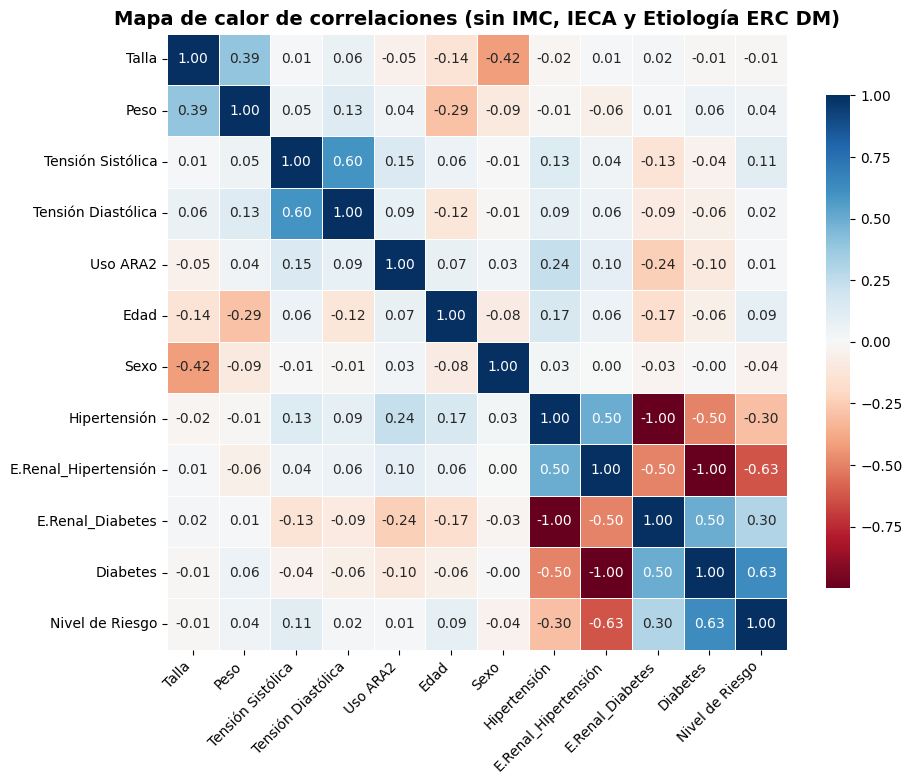

In [ ]:
# Diccionario de nombres nuevos para las variables
nombres_nuevos = {
    '36_RcbeIECA_SI': 'Uso IECA',
    '37_RcbeARA2_SI': 'Uso ARA2',
    'IMC': 'Índice Masa Corporal',
    'EDAD (Años cumplidos)': 'Edad',
    '8_Sexo_F': 'Sexo',
    '24_Talla': 'Talla',
    '23_Peso': 'Peso',
    '22_EtiologiaERC_HTA': 'E.Renal_Hipertensión',
    '22_EtiologiaERC_DM': 'E.Renal_Diabetes',
    '25_TenArtSis': 'Tensión Sistólica',
    '26_TenArtDitlica': 'Tensión Diastólica',
    '18_DxHTA_SI': 'Hipertensión',
    '20_DxDM_SI': 'Diabetes',
    'Riesgo_Nivel': 'Nivel de Riesgo'
}

# Variables que queremos eliminar del heatmap
variables_a_ocultar = ['IMC', '36_RcbeIECA_SI', '22_EtiologiaERC_HTA-DM']

# Calcular la matriz de correlación y eliminar variables no deseadas
correlation_matrix = df.corr().drop(index=variables_a_ocultar, columns=variables_a_ocultar, errors='ignore')

# Renombrar las etiquetas de las variables en la matriz de correlación
correlation_matrix = correlation_matrix.rename(columns=nombres_nuevos, index=nombres_nuevos)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Generar el mapa de calor sin las variables eliminadas y con nombres personalizados
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu", center=0, linewidths=0.5, cbar_kws={'shrink': 0.8})

# Ajustar la rotación de las etiquetas
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Agregar título
plt.title("Mapa de calor de correlaciones (sin IMC, IECA y Etiología ERC DM)", fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

**Analisis de variables que puedan estar relacioandas, y pueden generar multicolinealidad:**

1. EL IMC es una formula derivada del peso y la talla, por lo que tener las tres variables puede generar problemas en el modelo, por lo que se deja solamente IMC.
2. Tensión Arterial Sistólica (25_TenArtSis) y Tensión Arterial Diastólica (26_TenArtDitlica) ambas miden la presión arterial. por lo tanto se toma solo la sistolica.
3. 22_EtiologiaERC_HTA, 22_EtiologiaERC_DM, y 22_EtiologiaERC_HTA-DM, las tres están describiendo la misma condición de forma distinta y al tener además, 18_DxHTA_SI y 20_DxDM_SI.

Las personas que tienen hipertensión y diabetes a menudo también tienen enfermedades renales. Por lo tanto, solo se usara para el modelo 18_DxHTA_SI y 20_DxDM.


### **SELECCIÓN DE LA VARIABLE**

 Selecionamos columnas específicas del DataFrame original para crear un nuevo DataFrame llamado df_final.Extrayendo solo las variables que nos interesan para realizar el análisis o modelo.

In [ ]:
#Selección de variables
df_final=df[['IMC', '25_TenArtSis', '36_RcbeIECA_SI', '37_RcbeARA2_SI',
        'EDAD (Años cumplidos)', '8_Sexo_F', '18_DxHTA_SI', '20_DxDM_SI', 'Riesgo_Nivel']]


###  **Análisis de univariado**

Desde el análisis univariado se busca entender la distribución de las variables continuos y si existen datos atipicos.

In [ ]:
#Estadisticas descriptivas
df[['IMC','EDAD (Años cumplidos)','25_TenArtSis']].describe()

df.head(5)

,IMC,24_Talla,23_Peso,25_TenArtSis,26_TenArtDitlica,36_RcbeIECA_SI,37_RcbeARA2_SI,22_EtiologiaERC_HTA-DM,EDAD (Años cumplidos),8_Sexo_F,18_DxHTA_SI,22_EtiologiaERC_HTA,22_EtiologiaERC_DM,20_DxDM_SI,Riesgo_Nivel
0,26.892323,167.0,75.0,130.0,89.0,0,0,0,81.0,0,1,1,0,0,1
1,31.250000,160.0,80.0,130.0,70.0,0,0,0,55.0,0,1,1,0,0,2
2,24.690405,161.0,64.0,160.0,80.0,0,0,0,65.0,1,1,1,0,0,2
3,25.000000,160.0,64.0,160.0,80.0,0,0,1,78.0,1,1,0,0,1,3
4,23.437500,160.0,60.0,110.0,80.0,0,0,0,55.0,1,0,0,1,1,3


<Figure size 600x400 with 0 Axes>

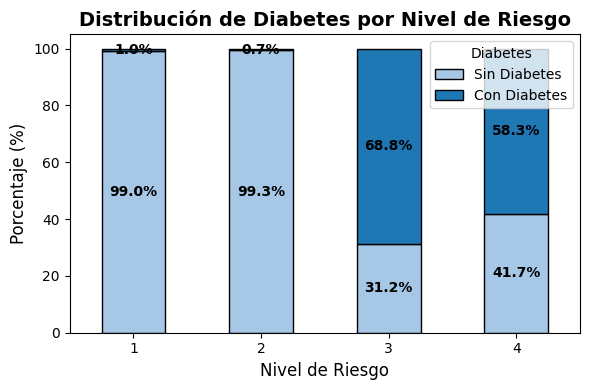

In [ ]:
import matplotlib.pyplot as plt

# Crear la tabla de frecuencias relativas (%)
df_percent = df.groupby('Riesgo_Nivel')['20_DxDM_SI'].value_counts(normalize=True).unstack() * 100

# Asegurar que los valores nulos sean 0
df_percent = df_percent.fillna(0)

# Crear la figura con un tamaño mayor
plt.figure(figsize=(6, 4))

# Crear el gráfico de barras apiladas con colores mejorados
ax = df_percent.plot(kind='bar', stacked=True, figsize=(6, 4), color=['#A7C7E7', '#1F77B4'], edgecolor='black')

# Agregar etiquetas con porcentajes en cada barra
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', color='black', fontsize=10, weight='bold')

# Personalización del gráfico
plt.title('Distribución de Diabetes por Nivel de Riesgo', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de Riesgo', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=0)  # Asegurar que los valores sean horizontales
plt.legend(title="Diabetes", labels=['Sin Diabetes', 'Con Diabetes'], loc="upper right", frameon=True)

# Ajustar los márgenes para que no se corte el gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()


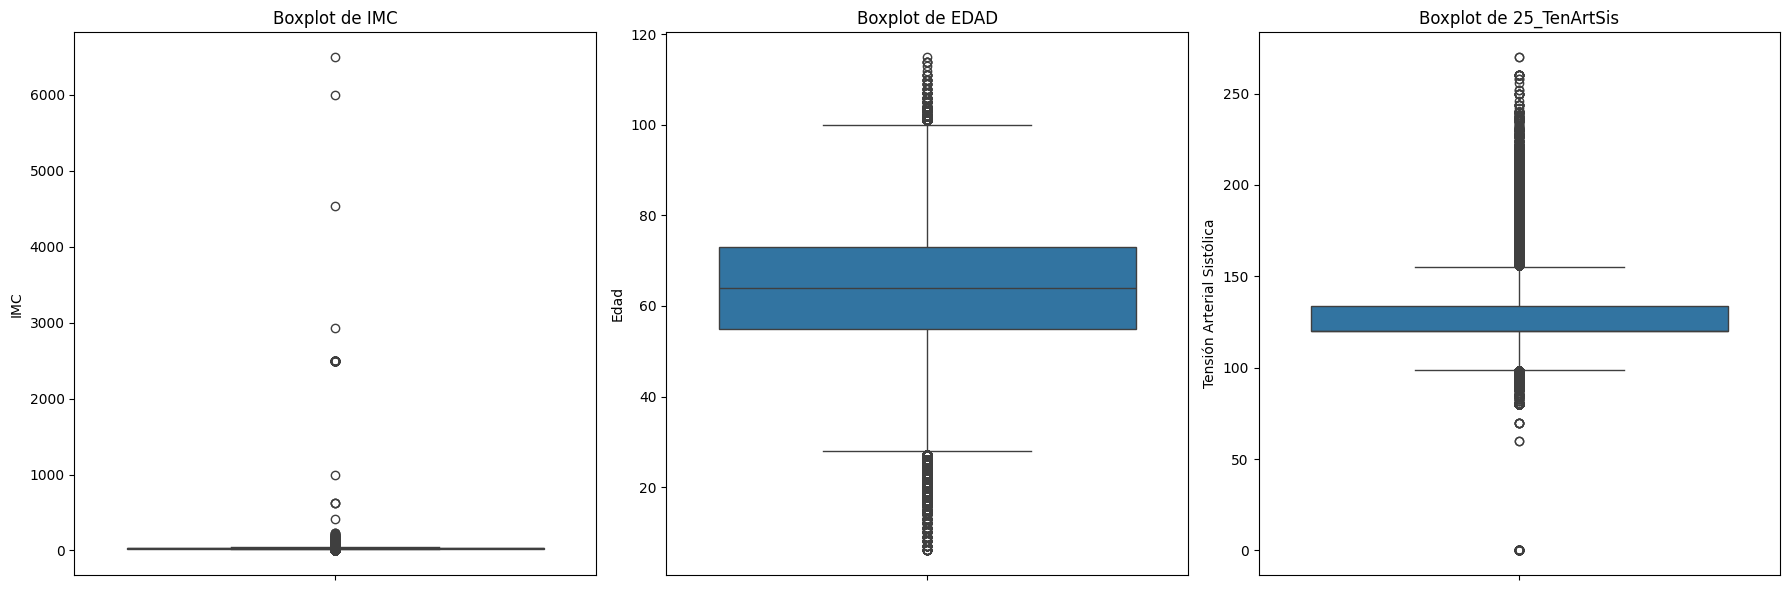

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot para IMC
sns.boxplot(ax=axes[0], data=df_final['IMC'])
axes[0].set_title('Boxplot de IMC')
axes[0].set_ylabel('IMC')

# Boxplot para EDAD
sns.boxplot(ax=axes[1], data=df_final['EDAD (Años cumplidos)'])
axes[1].set_title('Boxplot de EDAD')
axes[1].set_ylabel('Edad')

# Boxplot para 25_TenArtSis
sns.boxplot(ax=axes[2], data=df_final['25_TenArtSis'])
axes[2].set_title('Boxplot de 25_TenArtSis')
axes[2].set_ylabel('Tensión Arterial Sistólica')

# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


###  **Análisis Bivariado**

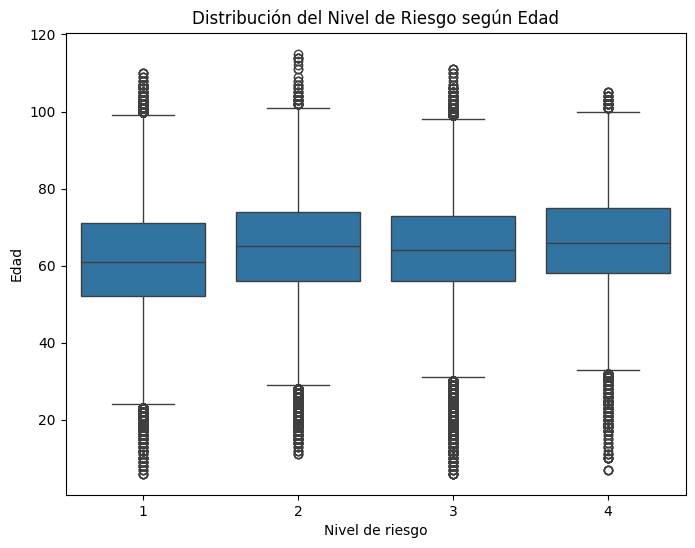

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Riesgo_Nivel', y='EDAD (Años cumplidos)', data=df)
plt.title('Distribución del Nivel de Riesgo según Edad')
plt.xlabel('Nivel de riesgo')
plt.ylabel('Edad')
plt.show()

<Figure size 600x400 with 0 Axes>

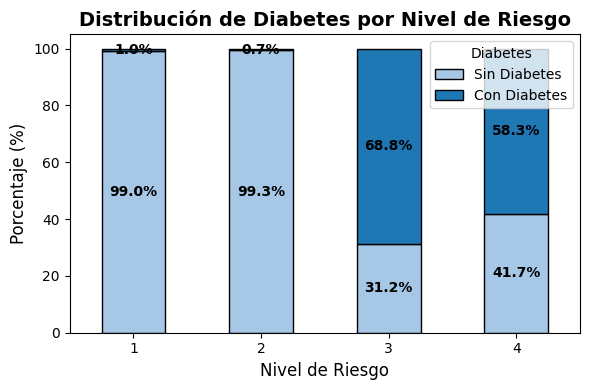

In [ ]:
#Crear la figura con un tamaño mayor
plt.figure(figsize=(6, 4))

# Crear el gráfico de barras apiladas con colores mejorados
ax = df_percent.plot(kind='bar', stacked=True, figsize=(6,4), color=['#A7C7E7', '#1F77B4'], edgecolor='black')

# Agregar etiquetas con porcentajes en cada barra
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', color='black', fontsize=10, weight='bold')

# Personalización del gráfico
plt.title('Distribución de Diabetes por Nivel de Riesgo', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de Riesgo', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=0)  # Asegurar que los valores sean horizontales
plt.legend(title="Diabetes", labels=['Sin Diabetes', 'Con Diabetes'], loc="upper right", frameon=True)

# Ajustar los márgenes para que no se corte el gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()


###  **Revisión de datos atípicos**

In [ ]:
#Cantidad de valores atípicos
#Función para calcular IQR

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[ ((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))) ]
   return outliers

outliers = find_outliers_IQR(df['EDAD (Años cumplidos)'])

print('número de outliers: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers: 10347
max valor outlier: 115.0
min valor outlier: 6.0
16         102.0
88          23.0
291        101.0
456         27.0
483        103.0
           ...  
2781597     25.0
2781647    104.0
2781927     18.0
2781932     19.0
2782575     25.0
Name: EDAD (Años cumplidos), Length: 10347, dtype: float64


In [ ]:
outliers = find_outliers_IQR(df['IMC'])

print('número de outliers: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers: 21282
max valor outlier: 6499.999999999999
min valor outlier: 0.0
41         48.117539
75         45.369407
81         41.786685
104        45.369407
130        44.444444
             ...    
2782048    12.903226
2782200    51.423324
2782206    44.063451
2782478    50.321396
2782492    14.325069
Name: IMC, Length: 21282, dtype: float64


In [ ]:
outliers = find_outliers_IQR(df['25_TenArtSis'])

print('número de outliers: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers: 61702
max valor outlier: 270.0
min valor outlier: 0.0
2          160.0
3          160.0
8          160.0
9          160.0
11         160.0
           ...  
2782717    160.0
2782791    160.0
2782798    160.0
2782881    160.0
2782882    160.0
Name: 25_TenArtSis, Length: 61702, dtype: float64


### Imputación de datos atipicos

In [ ]:
# Imputamos los valores por la mediana

def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper, # donde sea mayor
       df.median(),             # colocamos la mediana
       np.where(              # en otros caso:
           df < lower,        # Cuando sea menor a lower
           df.median(),         # colocamos la mediana
           df                 # el resto de las veces dejamos el valor como estaba
           )
       )
   return df


In [ ]:
df['IMC'] = impute_outliers_IQR(df['IMC'])
df.describe()['IMC']

,IMC
count,927678.000000
mean,28.067596
std,4.825984
min,14.381986
25%,24.654832
50%,27.777778
75%,31.163435
max,41.752674


In [ ]:
df['25_TenArtSis'] = impute_outliers_IQR(df['25_TenArtSis'])
df.describe()['25_TenArtSis']

,25_TenArtSis
count,927678.000000
mean,123.538251
std,11.905066
min,99.000000
25%,120.000000
50%,120.000000
75%,130.000000
max,155.000000


In [ ]:
df['EDAD (Años cumplidos)'] = impute_outliers_IQR(df['EDAD (Años cumplidos)'])
df.describe()['EDAD (Años cumplidos)']

,EDAD (Años cumplidos)
count,927678.000000
mean,63.784893
std,13.202347
min,28.000000
25%,55.000000
50%,64.000000
75%,73.000000
max,100.000000


[texto del enlace](https://)### **Datos de entrenamiento y prueba**[texto del enlace](https://)

In [ ]:
# Dividir en características (X) y etiquetas (y)
X = df.drop("Riesgo_Nivel", axis=1)
y = df["Riesgo_Nivel"]

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Normalización de variables**

In [ ]:
# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(multi_class='multinomial', max_iter=100000)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)


# Hacer predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.611751897205933
Confusion Matrix:
[[33635 18192   613     0]
 [21611 27111   422     0]
 [ 8662 14677 52756     0]
 [ 1084  2144  4629     0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.64      0.57     52440
           2       0.44      0.55      0.49     49144
           3       0.90      0.69      0.78     76095
           4       0.00      0.00      0.00      7857

    accuracy                           0.61    185536
   macro avg       0.46      0.47      0.46    185536
weighted avg       0.63      0.61      0.61    185536



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(df[['Riesgo_Nivel']].value_counts())


Riesgo_Nivel
3               380002
1               263660
2               244388
4                39628
Name: count, dtype: int64


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 927678 entries, 0 to 2782906
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   IMC                     927678 non-null  float64
 1   24_Talla                927678 non-null  float64
 2   23_Peso                 927678 non-null  float64
 3   25_TenArtSis            927678 non-null  float64
 4   26_TenArtDitlica        927678 non-null  float64
 5   36_RcbeIECA_SI          927678 non-null  int64  
 6   37_RcbeARA2_SI          927678 non-null  int64  
 7   22_EtiologiaERC_HTA-DM  927678 non-null  int64  
 8   EDAD (Años cumplidos)   927678 non-null  float64
 9   8_Sexo_F                927678 non-null  int64  
 10  18_DxHTA_SI             927678 non-null  int64  
 11  22_EtiologiaERC_HTA     927678 non-null  int64  
 12  22_EtiologiaERC_DM      927678 non-null  int64  
 13  20_DxDM_SI              927678 non-null  int64  
 14  Riesgo_Nivel            

Vista preliminar
Observamos los primeros y ultimos 5 datos del data set

In [ ]:
df.head()

,IMC,24_Talla,23_Peso,25_TenArtSis,26_TenArtDitlica,36_RcbeIECA_SI,37_RcbeARA2_SI,22_EtiologiaERC_HTA-DM,EDAD (Años cumplidos),8_Sexo_F,18_DxHTA_SI,22_EtiologiaERC_HTA,22_EtiologiaERC_DM,20_DxDM_SI,Riesgo_Nivel
0,26.892323,167.0,75.0,130.0,89.0,0,0,0,81.0,0,1,1,0,0,1
1,31.250000,160.0,80.0,130.0,70.0,0,0,0,55.0,0,1,1,0,0,2
2,24.690405,161.0,64.0,120.0,80.0,0,0,0,65.0,1,1,1,0,0,2
3,25.000000,160.0,64.0,120.0,80.0,0,0,1,78.0,1,1,0,0,1,3
4,23.437500,160.0,60.0,110.0,80.0,0,0,0,55.0,1,0,0,1,1,3


In [ ]:
df.tail()

,IMC,24_Talla,23_Peso,25_TenArtSis,26_TenArtDitlica,36_RcbeIECA_SI,37_RcbeARA2_SI,22_EtiologiaERC_HTA-DM,EDAD (Años cumplidos),8_Sexo_F,18_DxHTA_SI,22_EtiologiaERC_HTA,22_EtiologiaERC_DM,20_DxDM_SI,Riesgo_Nivel
2782897,24.983563,156.0,60.8,120.0,80.0,0,0,0,66.0,1,1,1,0,0,2
2782898,23.875115,165.0,65.0,110.0,70.0,0,0,0,78.0,0,1,1,0,0,3
2782899,25.271203,156.0,61.5,150.0,80.0,0,0,1,79.0,1,1,0,0,1,3
2782902,37.460978,155.0,90.0,136.0,76.0,0,0,0,47.0,1,1,1,0,0,3
2782906,27.968016,167.0,78.0,120.0,80.0,0,0,0,49.0,0,0,0,1,1,3


In [ ]:
# Cargar los datos (asegúrate de que 'df' ya esté definido con las variables necesarias)
features = ['IMC', 'Presion_Sistolica', 'Presion_Diastolica', 'Edad', 'Sexo', 'Diabetes', 'Hipertension']
X = df[features]
y = df['Riesgo_Nivel']

# Estandarizar los datos (PCA es sensible a la escala de las variables)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA y elegir número óptimo de componentes
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Analizar la varianza explicada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
num_componentes = np.argmax(varianza_acumulada >= 0.95) + 1  # Elegir componentes que explican el 95% de la varianza

# Aplicar PCA con el número óptimo de componentes
pca = PCA(n_components=num_componentes)
X_pca_final = pca.fit_transform(X_scaled)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Logística
model = LogisticRegression(multi_class='multinomial', max_iter=10000)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy_pca = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo con PCA: {accuracy_pca:.4f}")


KeyError: "['Presion_Sistolica', 'Presion_Diastolica', 'Edad', 'Sexo', 'Diabetes', 'Hipertension'] not in index"